<a href="https://colab.research.google.com/github/ANAGHA-20/face-alignment/blob/master/Faceswap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt

def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index


In [ ]:
img = cv2.imread("/content/drive/MyDrive/Input/muslim_attire2.jpg")
img2 = cv2.imread("/content/drive/MyDrive/Input/muslim_attire.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

mask = np.zeros_like(img_gray)

img2_new_face = np.zeros_like(img2_gray)



In [ ]:
detector = dlib.get_frontal_face_detector()
try:
  predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
except:
  !wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK
  !bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2
  predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

height, width, channels = img2.shape
img2_new_face = np.zeros((height, width, channels), np.uint8)
  


In [ ]:
#Face1
faces = detector(img_gray)
for face in faces:
    landmarks = predictor(img_gray, face)
    landmarks_points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))

        points = np.array(landmarks_points, np.int32)
        convexhull = cv2.convexHull(points)
        cv2.fillConvexPoly(mask, convexhull, 255)

         # Delaunay triangulation
        rect = cv2.boundingRect(convexhull)
        subdiv = cv2.Subdiv2D(rect)
        subdiv.insert(landmarks_points)
        triangles = subdiv.getTriangleList()
        triangles = np.array(triangles, dtype=np.int32)

        indexes_triangles = []
        for t in triangles:
            pt1 = (t[0], t[1])
            pt2 = (t[2], t[3])
            pt3 = (t[4], t[5])

            index_pt1 = np.where((points == pt1).all(axis=1))
            index_pt1 = extract_index_nparray(index_pt1)

            index_pt2 = np.where((points == pt2).all(axis=1))
            index_pt2 = extract_index_nparray(index_pt2)

            index_pt3 = np.where((points == pt3).all(axis=1))
            index_pt3 = extract_index_nparray(index_pt3)

            if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
                triangle = [index_pt1, index_pt2, index_pt3]
                indexes_triangles.append(triangle)

     

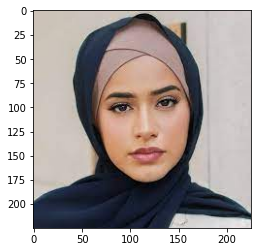

In [ ]:
# Face 2
faces2 = detector(img2_gray)
for face in faces2:
    landmarks = predictor(img2_gray, face)
    landmarks_points2 = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points2.append((x, y))
        # cv2.circle(img2, (x, y), 2, (0, 255, 0), -1)

    points2 = np.array(landmarks_points2, np.int32)
    convexhull2 = cv2.convexHull(points2)
    
    

plt.imshow(img2[:, :, ::-1])
plt.show()

In [ ]:
lines_space_mask = np.zeros_like(img_gray)
lines_space_new_face = np.zeros_like(img2)
for triangle_index in indexes_triangles:
    tr1_pt1 = landmarks_points[triangle_index[0]]
    tr1_pt2 = landmarks_points[triangle_index[1]]
    tr1_pt3 = landmarks_points[triangle_index[2]]
    triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)

    rect1 = cv2.boundingRect(triangle1)
    (x, y, w, h) = rect1
    cropped_triangle = img[y: y+h, x: x+w]
    cropped_tr1_mask = np.zeros((h, w), np.uint8)

    points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
                      [tr1_pt2[0] - x, tr1_pt2[1] - y],
                      [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)
    
    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)

    # cv2.line(img, tr1_pt1, tr1_pt2, (0, 0, 255), 2)
    # cv2.line(img, tr1_pt3, tr1_pt2, (0, 0, 255), 2)
    # cv2.line(img, tr1_pt1, tr1_pt3, (0, 0, 255), 2)

    cv2.line(lines_space_mask, tr1_pt1, tr1_pt2, 255)
    cv2.line(lines_space_mask, tr1_pt2, tr1_pt3, 255)
    cv2.line(lines_space_mask, tr1_pt1, tr1_pt3, 255)
    lines_space = cv2.bitwise_and(img, img, mask=lines_space_mask)


    tr2_pt1 = landmarks_points2[triangle_index[0]]
    tr2_pt2 = landmarks_points2[triangle_index[1]]
    tr2_pt3 = landmarks_points2[triangle_index[2]]
    triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)

    rect2 = cv2.boundingRect(triangle2)
    (x, y, w, h) = rect2
    cropped_tr2_mask = np.zeros((h, w), np.uint8)

    points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
                      [tr2_pt2[0] - x, tr2_pt2[1] - y],
                      [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)
    
    cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)
    
    # cv2.line(img2, tr2_pt1, tr2_pt2, (0, 0, 255), 2)
    # cv2.line(img2, tr2_pt3, tr2_pt2, (0, 0, 255), 2)
    # cv2.line(img2, tr2_pt1, tr2_pt3, (0, 0, 255), 2)

    points = np.float32(points)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points, points2)
    warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)
    
    # plt.imshow(warped_triangle[:, :, ::-1])
    # plt.show()
    # Reconstructing destination face
    
    img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]
    img2_new_face_rect_area_gray = cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)

    # Let's create a mask to remove the lines between the triangles
    _, mask_triangles_designed = cv2.threshold(img2_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

    img2_new_face_rect_area = cv2.add(img2_new_face_rect_area, warped_triangle)
    img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area

     

  

In [ ]:
# Face swapped (putting 1st face into 2nd face)
img2_face_mask = np.zeros_like(img2_gray)
img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
img2_face_mask = cv2.bitwise_not(img2_head_mask)

img2_head_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)

result = cv2.add(img2_head_noface, img2_new_face)


In [ ]:
(x, y, w, h) = cv2.boundingRect(convexhull2)
center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))

seamlessclone = cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.MIXED_CLONE)

file = "/content/drive/MyDrive/bobg_output/imgclone.jpg"
cv2.imwrite(file, seamlessclone)

True

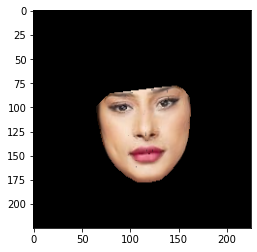

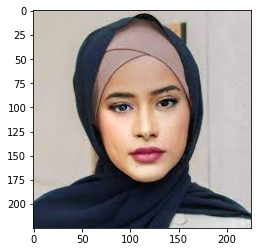

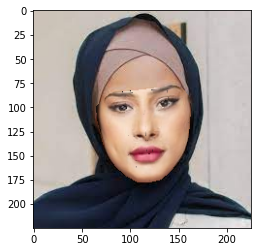

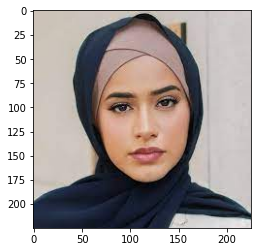

In [ ]:
plt.imshow(img2_new_face)
plt.show()
plt.imshow(seamlessclone[:, :, ::-1])
plt.show()
plt.imshow(result[:, :, ::-1])
plt.show()
plt.imshow(img2[:, :, ::-1])
plt.show()

In [ ]:

    # Face 2 new
# new_gray = cv2.cvtColor(img2_new_face, cv2.COLOR_BGR2GRAY)
# faces3 = detector(new_gray)
# for face in faces3:
#     landmarks = predictor(img2_gray, face)
#     landmarks_points3 = []
#     for n in range(0, 68):
#         x = landmarks.part(n).x
#         y = landmarks.part(n).y
#         landmarks_points2.append((x, y))

#     points3 = np.array(landmarks_points2, np.int32)
#     convexhull3 = cv2.convexHull(points2)

#         cv2.circle(img2_new_face, (x, y), 3, (0, 255, 0), -1)

IndentationError: ignored